In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import optimize as opt
import os

import warnings
warnings.filterwarnings('ignore')

In [202]:
def polinom_fit(x, a, b, c):
    return a * x**c + b

In [203]:
def linear_fit(x, a, b):
    return a * x + b

In [204]:
df = pd.DataFrame()

for file in os.listdir("data"):
    if file.startswith("NaI"):
        with open("data/" + file) as f:
            lines = f.readlines()
            x = list(map(lambda x: float(x.split()[0]), lines))
            y = list(map(lambda x: float(x.split()[1]), lines))
        df[file[:-4]] = y

Анодная характеристика

In [205]:
with open("data/anodnaya.txt") as f:
    lines = f.readlines() 
    anodnaya_x = np.array(list(map(lambda x: float(x.split()[0]), lines[2:])))
    anodnaya_k = np.array(list(map(lambda x: float(x.split()[1]), lines[2:])))
    anodnaya_y = np.array(list(map(lambda x: float(x.split()[2]), lines[2:]))) / anodnaya_k

popt, pcov = opt.curve_fit(polinom_fit, anodnaya_x, anodnaya_y, p0=[0.001, 0.001, 5], maxfev=2000)

Text(0.5, 0, 'Uk')

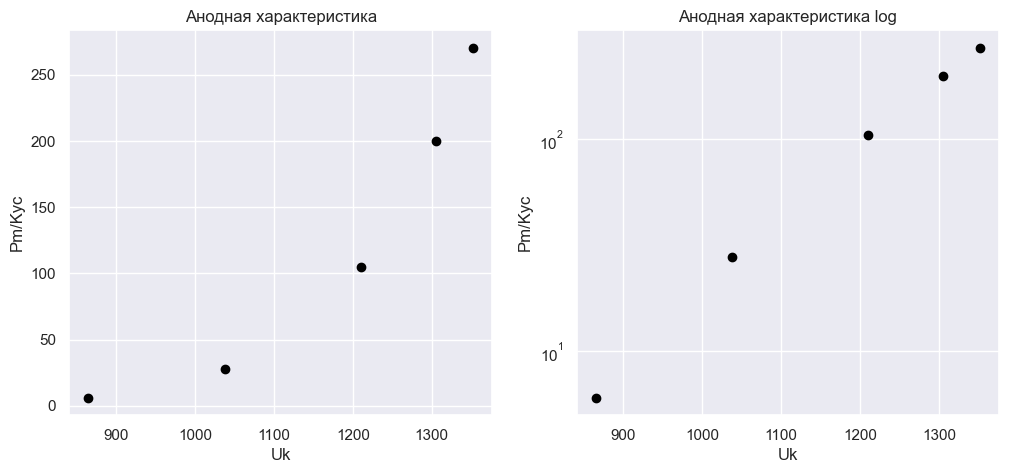

In [220]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(anodnaya_x, anodnaya_y, color="black")
# axs[0].plot(np.arange(865, 1352, 0.1), polinom_fit(np.arange(865, 1352, 0.1), *popt))
axs[0].set_title("Анодная характеристика")
axs[0].set_ylabel("Pm/Kус")
axs[0].set_xlabel("Uk")

axs[1].scatter(anodnaya_x, anodnaya_y, color="black")
# axs[1].plot(np.arange(865, 1352, 0.1), polinom_fit(np.arange(865, 1352, 0.1), *popt))
axs[1].set_yscale("log")
axs[1].set_title("Анодная характеристика log")
axs[1].set_ylabel("Pm/Kус")
axs[1].set_xlabel("Uk")

Градуировка

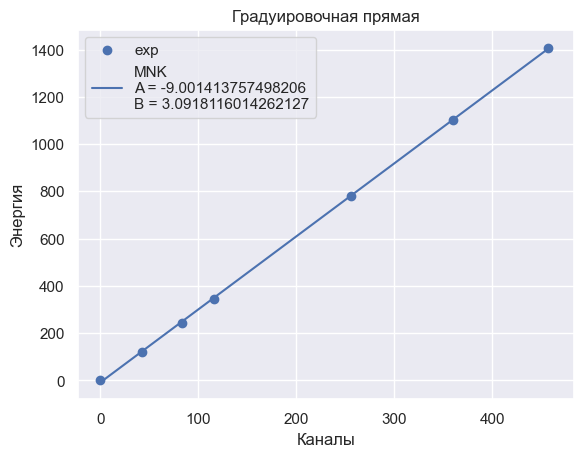

In [207]:
with open("data/grad.txt") as f:
    lines = f.readlines()
    grad_x = list(map(lambda x: float(x.split()[0]), lines[2:]))
    grad_y = list(map(lambda x: float(x.split()[1]), lines[2:]))

popt, pcov = opt.curve_fit(linear_fit, grad_x, grad_y)

plt.scatter(grad_x, grad_y, label="exp")
plt.plot(np.arange(0, 460, 0.1), linear_fit(np.arange(0, 460, 0.1), *popt),
         label=f"MNK\nA = {popt[1]}\nB = {popt[0]}")
plt.title("Градуировочная прямая")
plt.xlabel("Каналы")
plt.ylabel("Энергия")
plt.legend()

Изучение свойств сцинтилляторов

In [208]:
files = ["data/stilben_U1140_K4.txt", "data/tolan_U1140_K4.txt",
         "data/poltstir_U1140_K4.txt", "data/NaI_U1140_K4.txt"]
scint_df = pd.DataFrame(columns=["stilben", "tolan", "polysitr", "NaI"])

for file in range(len(files)):
    with open(files[file]) as f:
        lines = f.readlines()
        scint_df[scint_df.columns[file]] = list(map(lambda x: float(x.split()[1]), lines))

(20.0, 250.0)

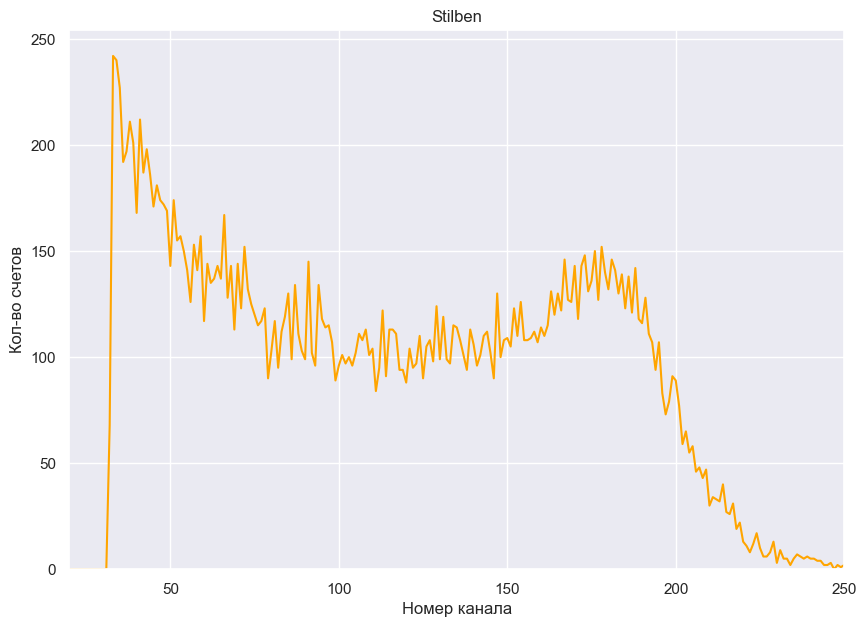

In [209]:
fig, axs = plt.subplots(figsize=(10, 7))

axs.plot(scint_df.index, scint_df["stilben"], color="orange")
axs.set_title("Stilben")
axs.set_ylabel("Кол-во счетов")
axs.set_xlabel("Номер канала")
axs.set_ylim(bottom=0)
axs.set_xlim(20, 250)

(20.0, 250.0)

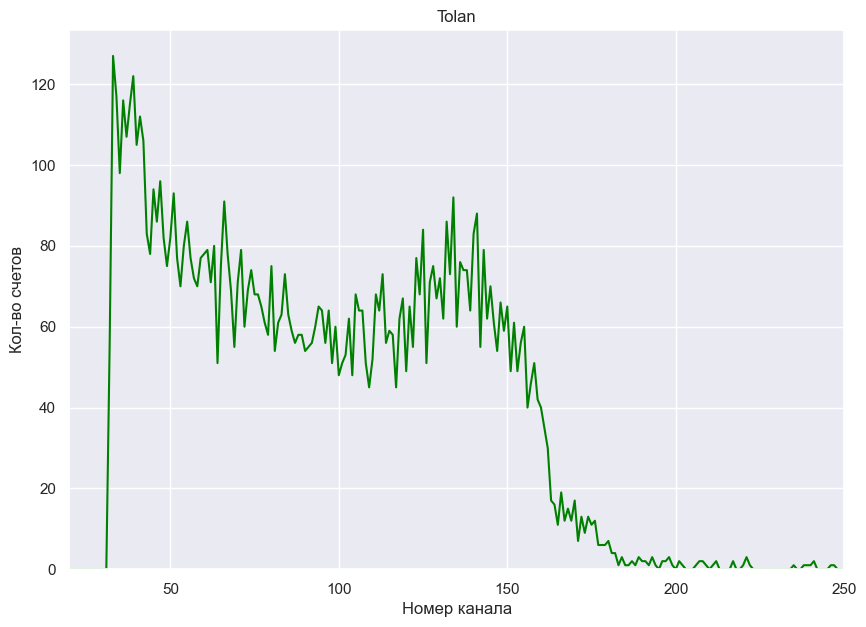

In [210]:
fig, axs = plt.subplots(figsize=(10, 7))

axs.plot(scint_df.index, scint_df["tolan"], color="green")
axs.set_title("Tolan")
axs.set_ylabel("Кол-во счетов")
axs.set_xlabel("Номер канала")
axs.set_ylim(bottom=0)
axs.set_xlim(20, 250)

(20.0, 200.0)

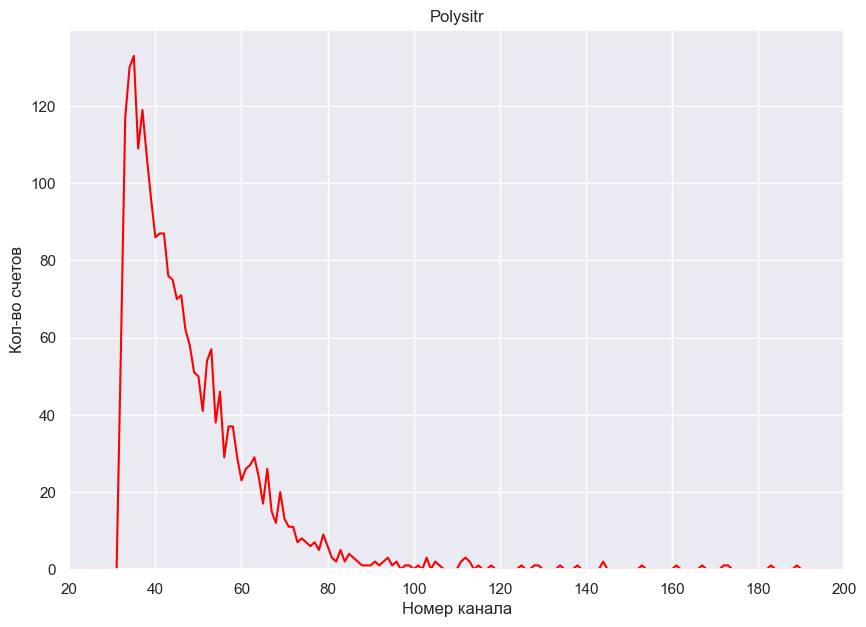

In [211]:
fig, axs = plt.subplots(figsize=(10, 7))

axs.plot(scint_df.index, scint_df["polysitr"], color="red")
axs.set_title("Polysitr")
axs.set_ylabel("Кол-во счетов")
axs.set_xlabel("Номер канала")
axs.set_ylim(bottom=0)
axs.set_xlim(20, 200)

(20.0, 250.0)

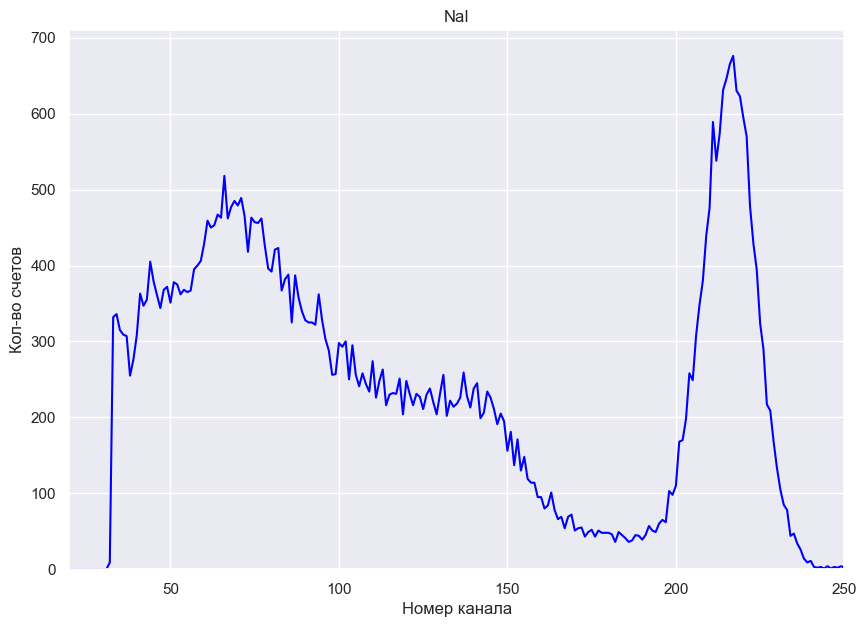

In [212]:
fig, axs = plt.subplots(figsize=(10, 7))

axs.plot(scint_df.index, scint_df["NaI"], color="blue")
axs.set_title("NaI")
axs.set_ylabel("Кол-во счетов")
axs.set_xlabel("Номер канала")
axs.set_ylim(bottom=0)
axs.set_xlim(20, 250)

Спектры различных источников c сцинтиллятором NaI

(0.0, 709.8)

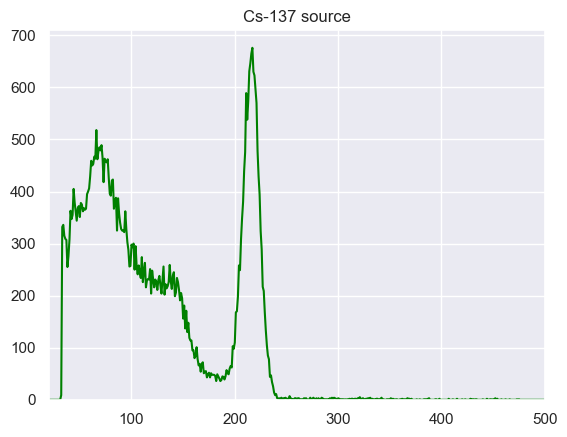

In [213]:
sns.set_theme(style="darkgrid")

# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=df.index, y=df["NaI_U1140_K4"], color="green")

plt.title("Cs-137 source")
plt.xlim(20, 500)
plt.ylabel("")
plt.ylim(bottom=0)

(0.0, 9549.75)

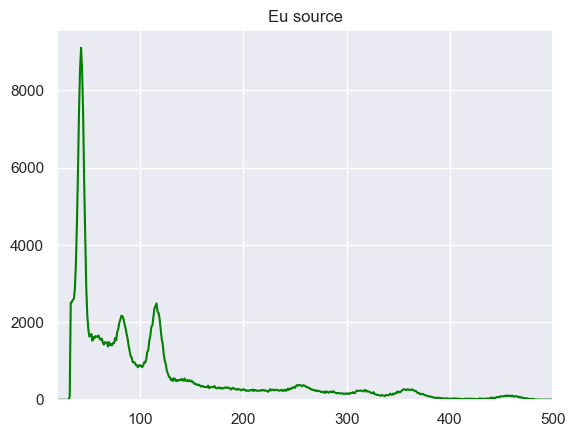

In [214]:
sns.lineplot(x=df.index, y=df["NaI_Eu_U1140_K4"], color="green")

plt.title("Eu source")
plt.xlim(20, 500)
plt.ylabel("")
plt.ylim(bottom=0)

(0.0, 630.0)

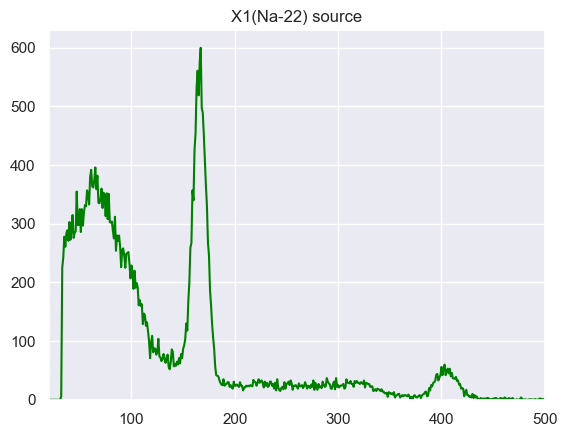

In [215]:
sns.lineplot(x=df.index, y=df["NaI_x1_U1140_K4"], color="green")

plt.title("X1(Na-22) source")
plt.ylabel("")
plt.xlim(20, 500)
plt.ylim(bottom=0)

(0.0, 437.85)

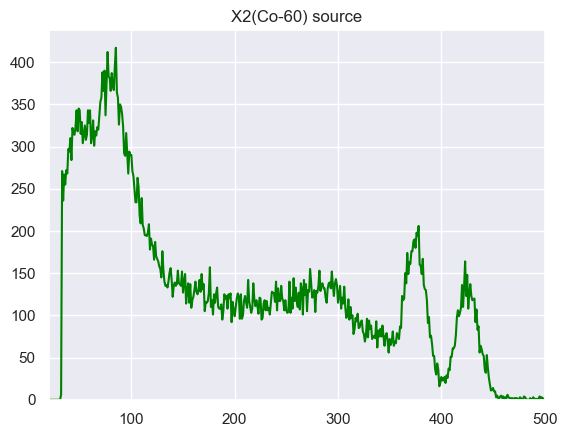

In [216]:
sns.lineplot(x=df.index, y=df["NaI_x2_U1140_K4"], color="green")

plt.title("X2(Co-60) source")
plt.ylabel("")
plt.xlim(20, 500)
plt.ylim(bottom=0)

In [217]:
def fitter(E, c):
    return c/np.sqrt(E)

(0.0, 17.822914720750187)

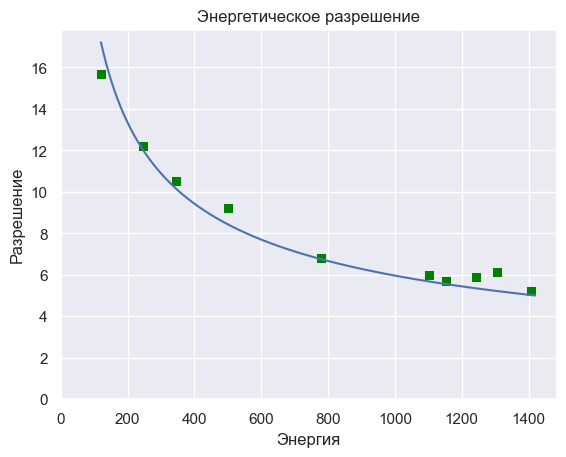

In [218]:
with open("data/razresh.txt") as f:
    lines = f.readlines()
    x = list(map(lambda x: float(x.split()[0]), lines[2:]))
    y = list(map(lambda x: float(x.split()[1]), lines[2:]))

popt, pcov = opt.curve_fit(fitter, x, y)

sns.scatterplot(x=x, y=y, s=50, color="green", marker="s", legend=False)
sns.lineplot(x=np.arange(120, 1420, 0.1), y=fitter(np.arange(120, 1420, 0.1), *popt))

plt.title("Энергетическое разрешение")
plt.xlabel("Энергия")
plt.ylabel("Разрешение")
plt.xlim(left=0)
plt.ylim(bottom=0)